In [1]:
import torch
import matplotlib.pyplot as plt

from src.manifolds.deformed_sum_of_gaussian_pullback_manifold.double_quadratic_banana_pullback_manifold import DoubleQuadraticBananaPullbackManifold
# from src.riemannian_autoencoder.deformed_gaussian_riemannian_autoencoder import DeformedGaussianRiemannianAutoencoder

/Users/wdiepeveen/Documents/Postdoc/projects/1 - score-based Riemannian geometry/src/Score-based-Riemannian-geometry/.venv/lib/python3.8/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


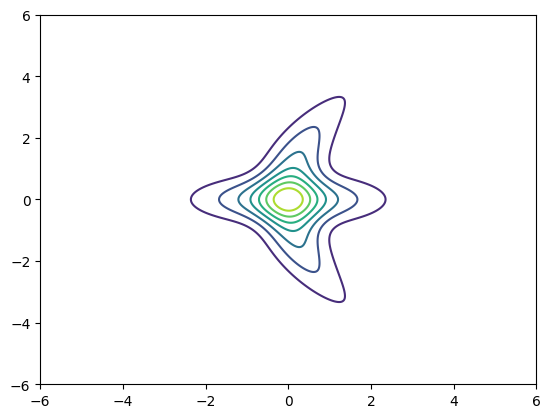

In [2]:
L1 = 100
tol1 = 1e-3
max_iter1 = 20000
step_size1 = 1/8

L2 = 2 * L1
tol2 = 1e-4
max_iter2 = 100

double_banana_manifold = DoubleQuadraticBananaPullbackManifold(
    L1=L1, tol1=tol1, max_iter1=max_iter1, step_size1=step_size1, 
    L2=L2, tol2=tol2, max_iter2=max_iter2
    )

xx = torch.linspace(-6.0, 6.0, 500)
yy = torch.linspace(-6.0, 6.0, 500)
x_grid, y_grid = torch.meshgrid(xx, yy)

xy_grid = torch.zeros((*x_grid.shape,2))
xy_grid[:,:,0] = x_grid
xy_grid[:,:,1] = y_grid

density_banana = torch.exp(double_banana_manifold.dsg.log_density(xy_grid.reshape(-1,2)).reshape(x_grid.shape))
plt.contour(x_grid, y_grid, density_banana)
plt.show()

In [3]:
# special points
x0 = torch.tensor([2.,4.])
x1 = torch.tensor([2.,-4.])
x2 = torch.tensor([2.,0.])

In [4]:
# # test barycentre # TODO this might be very hard to compute...
# x=torch.zeros((3,2))
# x[0] = x0
# x[1] = x1
# x[2] = x2

# barycentre = double_banana_manifold.barycentre(x).detach().numpy()

# plt.contour(x_grid, y_grid, density_banana)
# plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
# plt.scatter(barycentre[0], barycentre[1], color="orange")
# plt.savefig("results/quadratic_double_banana/barycentre.eps")
# plt.show()

In [5]:
# test inner
X = torch.eye(2)

inner_0 = double_banana_manifold.inner(torch.zeros(2)[None], X[None], X[None])
inner_x0 = double_banana_manifold.inner(x0[None], X[None], X[None])
inner_x2 = double_banana_manifold.inner(x2[None], X[None], X[None])

print(inner_0)
print(inner_x0)
print(inner_x2)

tensor([[[5.0625, 0.0000],
         [0.0000, 4.5156]]])
tensor([[[ 16.0000, -14.2222],
         [-14.2222,  12.7045]]])
tensor([[[ 0.2532,  0.0000],
         [ 0.0000, 15.9727]]])


/Users/wdiepeveen/Documents/Postdoc/projects/1 - score-based Riemannian geometry/src/Score-based-Riemannian-geometry/.venv/lib/python3.8/site-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Epoch 0, Loss 5.097842216491699, Validation 26.540668487548828
Epoch 10, Loss 5.076847076416016, Validation 27.87213897705078
Epoch 20, Loss 5.071970462799072, Validation 26.55689239501953
Epoch 30, Loss 5.072508811950684, Validation 27.12498664855957
Epoch 40, Loss 5.0723724365234375, Validation 27.458580017089844
Epoch 50, Loss 5.071613311767578, Validation 26.944833755493164
Epoch 60, Loss 5.071584701538086, Validation 27.089284896850586
Epoch 70, Loss 5.071533203125, Validation 27.113981246948242
Epoch 80, Loss 5.071511745452881, Validation 27.0709171295166
Epoch 90, Loss 5.0714898109436035, Validation 27.105152130126953
Epoch 0, Loss 57.19676208496094, Validation 31.32476234436035


/Users/wdiepeveen/Documents/Postdoc/projects/1 - score-based Riemannian geometry/src/Score-based-Riemannian-geometry/.venv/lib/python3.8/site-packages/nflows/transforms/coupling.py:481: UserWarning: Inputs to the softmax are not scaled down: initialization might be bad.
  warnings.warn(


Epoch 10, Loss 30.73000717163086, Validation 5.489404678344727
Epoch 20, Loss 27.34387969970703, Validation 1.802276611328125
Epoch 30, Loss 26.45502471923828, Validation 0.7007274627685547
Epoch 40, Loss 26.199569702148438, Validation 0.5030269622802734
Epoch 50, Loss 26.19190788269043, Validation 0.5428123474121094
Epoch 60, Loss 26.181964874267578, Validation 0.536041259765625
Epoch 70, Loss 26.173442840576172, Validation 0.5210342407226562
Epoch 80, Loss 26.169757843017578, Validation 0.5146045684814453
Epoch 90, Loss 26.167694091796875, Validation 0.5088653564453125
Epoch 0, Loss 27.191469192504883, Validation 1.5086498260498047
Epoch 100, Loss 26.881099700927734, Validation 1.2901649475097656
Epoch 200, Loss 26.755929946899414, Validation 1.1820564270019531
Epoch 300, Loss 26.69126319885254, Validation 1.121683120727539
Epoch 400, Loss 26.65604591369629, Validation 1.0855541229248047
Epoch 500, Loss 26.636083602905273, Validation 1.0627365112304688
Epoch 600, Loss 26.624280929565

/Users/wdiepeveen/Documents/Postdoc/projects/1 - score-based Riemannian geometry/src/Score-based-Riemannian-geometry/.venv/lib/python3.8/site-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Epoch 0, Loss 9.805809020996094, Validation 14.281089782714844
Epoch 10, Loss 5.026430130004883, Validation 5.006954193115234
Epoch 20, Loss 4.608461380004883, Validation 6.030538558959961
Epoch 30, Loss 4.303042411804199, Validation 5.668079376220703
Epoch 40, Loss 4.243876934051514, Validation 5.537805557250977
Epoch 50, Loss 4.238633632659912, Validation 5.943761825561523
Epoch 60, Loss 4.234745979309082, Validation 5.6422271728515625
Epoch 70, Loss 4.231277942657471, Validation 5.840293884277344
Epoch 80, Loss 4.229997634887695, Validation 5.728742599487305
Epoch 90, Loss 4.229312896728516, Validation 5.782779693603516
Epoch 0, Loss 23.908065795898438, Validation 6.124147415161133
Epoch 10, Loss 18.672414779663086, Validation 0.7856979370117188
Epoch 20, Loss 18.574234008789062, Validation 0.6896076202392578
Epoch 30, Loss 18.444244384765625, Validation 0.5641098022460938
Epoch 40, Loss 18.26275634765625, Validation 0.3780326843261719
Epoch 50, Loss 18.128671646118164, Validation 0

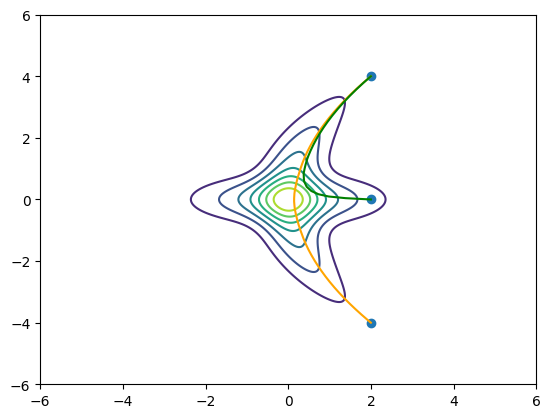

In [6]:
# test interpolation
t = torch.linspace(0.,1.,200)

geodesic_x0_x1 = double_banana_manifold.geodesic(x0,x1,t).detach().numpy()
geodesic_x0_x2 = double_banana_manifold.geodesic(x0,x2,t).detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.plot(geodesic_x0_x1[:,0], geodesic_x0_x1[:,1], color="orange")
plt.plot(geodesic_x0_x2[:,0], geodesic_x0_x2[:,1], color="green")
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.savefig("results/quadratic_double_banana/geodesic.eps")
plt.show()

# TODO make second plot with decision boundaries so that we can clearly see that we really only have weird geodesics on the boundary region

Epoch 0, Loss 5.097842216491699, Validation 26.540668487548828
Epoch 10, Loss 5.076847076416016, Validation 27.87213897705078
Epoch 20, Loss 5.071970462799072, Validation 26.55689239501953
Epoch 30, Loss 5.072508811950684, Validation 27.12498664855957
Epoch 40, Loss 5.0723724365234375, Validation 27.458580017089844
Epoch 50, Loss 5.071613311767578, Validation 26.944833755493164
Epoch 60, Loss 5.071584701538086, Validation 27.089284896850586
Epoch 70, Loss 5.071533203125, Validation 27.113981246948242
Epoch 80, Loss 5.071511745452881, Validation 27.0709171295166
Epoch 90, Loss 5.0714898109436035, Validation 27.105152130126953
Epoch 0, Loss 57.19676208496094, Validation 31.32476234436035
Epoch 10, Loss 30.73000717163086, Validation 5.489404678344727
Epoch 20, Loss 27.34387969970703, Validation 1.802276611328125
Epoch 30, Loss 26.45502471923828, Validation 0.7007274627685547
Epoch 40, Loss 26.199569702148438, Validation 0.5030269622802734
Epoch 50, Loss 26.19190788269043, Validation 0.542

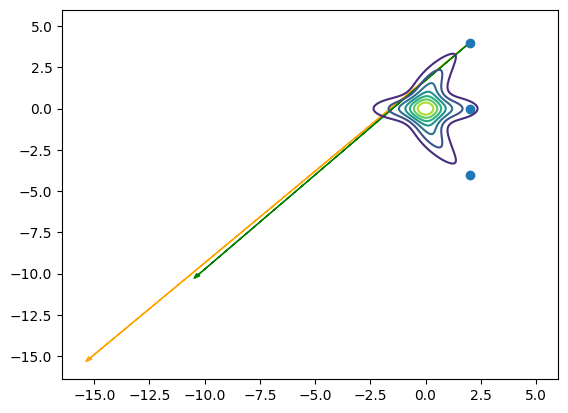

In [7]:
# test logarithmic mapping

logarithmic_x0_x1 = double_banana_manifold.log(x0,x1[None])[0].detach().numpy()
logarithmic_x0_x2 = double_banana_manifold.log(x0,x2[None])[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2, color="orange")
plt.arrow(x0[0], x0[1], logarithmic_x0_x2[0], logarithmic_x0_x2[1], head_width=0.2, color="green")
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.savefig("results/quadratic_double_banana/logarithmic.eps")
plt.show()

updating entry 0
updating entry 10
updating entry 20
updating entry 30
updating entry 40
updating entry 50
updating entry 60
updating entry 70
updating entry 80
updating entry 90
updating entry 100
updating entry 110
updating entry 120
updating entry 130
updating entry 140
updating entry 150
updating entry 160
updating entry 170
updating entry 180
updating entry 190
updating entry 0
updating entry 10
updating entry 20
updating entry 30
updating entry 40
updating entry 50
updating entry 60
updating entry 70
updating entry 80
updating entry 90
updating entry 100
updating entry 110
updating entry 120
updating entry 130
updating entry 140
updating entry 150
updating entry 160
updating entry 170
updating entry 180
updating entry 190


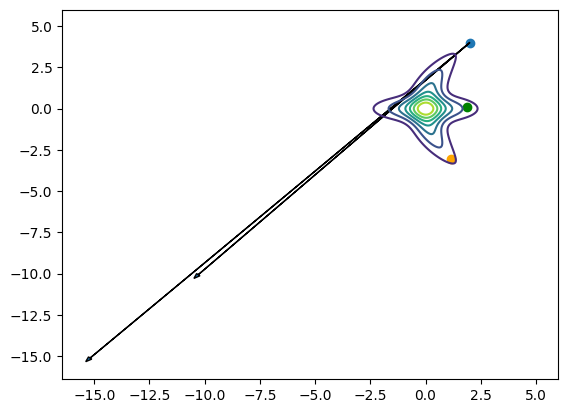

The error between exp_x0(log_x0 (x1)) and x1 is 1.2557694911956787
The error between exp_x0(log_x0 (x2)) and x2 is 0.16980330646038055


In [8]:
# test exponential mapping
exponential_to_x1 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x1)[None])[0].detach().numpy()
exponential_to_x2 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x2)[None])[0].detach().numpy()
# exponential_to_x2 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x2)[None])[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(x0[0], x0[1])
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2)
plt.arrow(x0[0], x0[1], logarithmic_x0_x2[0], logarithmic_x0_x2[1], head_width=0.2)
plt.scatter(exponential_to_x1[0], exponential_to_x1[1], color="orange")
plt.scatter(exponential_to_x2[0], exponential_to_x2[1], color="green")
plt.savefig("results/quadratic_double_banana/exponential.eps")
plt.show()
print(f"The error between exp_x0(log_x0 (x1)) and x1 is {torch.norm(torch.tensor(exponential_to_x1) - x1)}")
print(f"The error between exp_x0(log_x0 (x2)) and x2 is {torch.norm(torch.tensor(exponential_to_x2) - x2)}")

In [9]:
# test distance
l2_distance = torch.norm(x0 - x1)
distance = double_banana_manifold.distance(x0[None,None], x1[None,None])[0,0,0]
print(l2_distance)
print(distance)

Epoch 0, Loss 5.097842216491699, Validation 26.540668487548828
Epoch 10, Loss 5.076847076416016, Validation 27.87213897705078
Epoch 20, Loss 5.071970462799072, Validation 26.55689239501953
Epoch 30, Loss 5.072508811950684, Validation 27.12498664855957
Epoch 40, Loss 5.0723724365234375, Validation 27.458580017089844
Epoch 50, Loss 5.071613311767578, Validation 26.944833755493164
Epoch 60, Loss 5.071584701538086, Validation 27.089284896850586
Epoch 70, Loss 5.071533203125, Validation 27.113981246948242
Epoch 80, Loss 5.071511745452881, Validation 27.0709171295166
Epoch 90, Loss 5.0714898109436035, Validation 27.105152130126953
Epoch 0, Loss 57.19676208496094, Validation 31.32476234436035
Epoch 10, Loss 30.73000717163086, Validation 5.489404678344727
Epoch 20, Loss 27.34387969970703, Validation 1.802276611328125
Epoch 30, Loss 26.45502471923828, Validation 0.7007274627685547
Epoch 40, Loss 26.199569702148438, Validation 0.5030269622802734
Epoch 50, Loss 26.19190788269043, Validation 0.542

Epoch 0, Loss 9.805809020996094, Validation 14.281089782714844
Epoch 10, Loss 5.026430130004883, Validation 5.006954193115234
Epoch 20, Loss 4.608461380004883, Validation 6.030538558959961
Epoch 30, Loss 4.303042411804199, Validation 5.668079376220703
Epoch 40, Loss 4.243876934051514, Validation 5.537805557250977
Epoch 50, Loss 4.238633632659912, Validation 5.943761825561523
Epoch 60, Loss 4.234745979309082, Validation 5.6422271728515625
Epoch 70, Loss 4.231277942657471, Validation 5.840293884277344
Epoch 80, Loss 4.229997634887695, Validation 5.728742599487305
Epoch 90, Loss 4.229312896728516, Validation 5.782779693603516
Epoch 0, Loss 23.908065795898438, Validation 6.124147415161133
Epoch 10, Loss 18.672414779663086, Validation 0.7856979370117188
Epoch 20, Loss 18.574234008789062, Validation 0.6896076202392578
Epoch 30, Loss 18.444244384765625, Validation 0.5641098022460938
Epoch 40, Loss 18.26275634765625, Validation 0.3780326843261719
Epoch 50, Loss 18.128671646118164, Validation 0

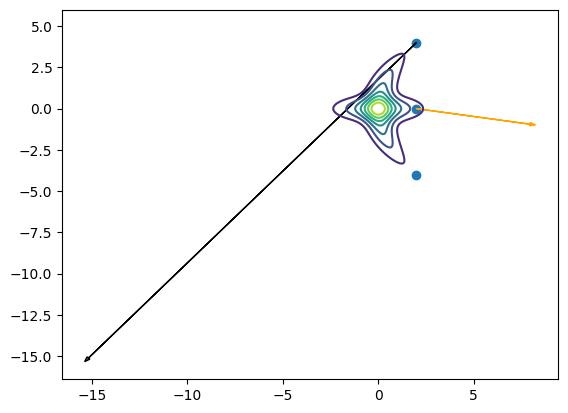

In [10]:
# test parallel transport
parallel_transport = double_banana_manifold.parallel_transport(x0, torch.tensor(logarithmic_x0_x1)[None], x2)[0]

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2)
plt.arrow(x2[0], x2[1], parallel_transport[0], parallel_transport[1], head_width=0.2, color="orange")
plt.savefig("results/quadratic_double_banana/parallel-transport.eps")
plt.show()


minimal curvature = -602.7388916015625 and maximal curvature = 0.13135147094726562


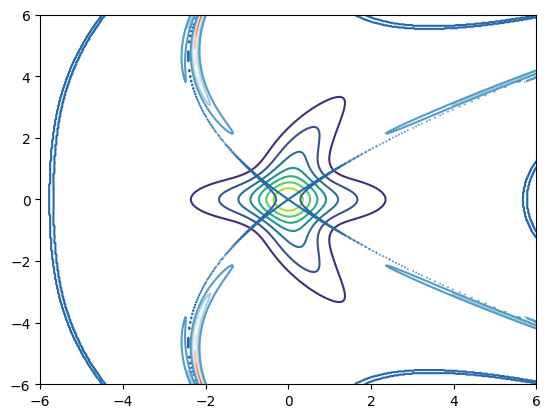

In [ ]:
ricci_scalar = double_banana_manifold.ricci_scalar(xy_grid.reshape(-1,2)).reshape(x_grid.shape)

print(f"minimal curvature = {ricci_scalar.min()} and maximal curvature = {ricci_scalar.max()}")

log_squared_ricci_scalar = torch.log(ricci_scalar **2)

plt.contour(x_grid, y_grid, density_banana)
plt.contour(x_grid, y_grid, ricci_scalar, cmap='RdBu')
# plt.contour(x_grid, y_grid, log_squared_ricci_scalar, cmap='RdBu')
plt.savefig("results/quadratic_double_banana/ricci-scalar.eps")
plt.show()